In [1]:
#!pip install jupyternotify
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [2]:
%%notify
import codecs
import glob
import multiprocessing
import os
import pprint
import re
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Anaconda3\envs\tensorflow\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


<IPython.core.display.Javascript object>

In [3]:
#nltk.download()

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
book_filenames= sorted(glob.glob('./subscene/*.txt'))
print(book_filenames)

['./subscene\\(Hijau) Anon-2018-Semua-WebDL-EveryAgent.srt.txt', './subscene\\(Kuning) Anon-2018-Semua-WebDL-EveryAgent.srt.txt', './subscene\\(Kuning) High.&.Low.The Movie.2.2017.720p.BluRay.x264.srt.txt', './subscene\\(Kuning) The Lost Battalion 2001 by EveryAgent.srt.txt', './subscene\\(Putih) Anon-2018-Semua-WebDL-EveryAgent.srt.txt', './subscene\\(Putih) The Lost Battalion 2001 by EveryAgent.srt.txt', './subscene\\-benz.Blindspot.S03E18.Clamorous Night.all.proper.hdtv.idfl-.srt.txt', './subscene\\01 Digimon Adventure Tri 1 Saikai (2015).srt.txt', './subscene\\01. Pilot.srt.txt', './subscene\\02. Let Go.srt.txt', './subscene\\03. Next of Kin.srt.txt', './subscene\\04. Worst Day Ever.srt.txt', './subscene\\05. Point of Origin.srt.txt', './subscene\\06 Rising.srt.txt', './subscene\\06. Heartbreaker.srt.txt', './subscene\\07. Full Moon (Creepy AF).srt.txt', './subscene\\08. Karmas a Bitch.srt.txt', './subscene\\09. Trapped.srt.txt', './subscene\\1. Pilot.srt.txt', './subscene\\1.srt.t

In [6]:
%%notify
corpus_raw = u''
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    try:
        with codecs.open(book_filename,"r", encoding="utf8") as book_file:
            corpus_raw += book_file.read()
    except Exception as e:
        print("Error reading", book_filename, e)
        pass
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading './subscene\(Hijau) Anon-2018-Semua-WebDL-EveryAgent.srt.txt'...
Corpus is now 24729 characters long

Reading './subscene\(Kuning) Anon-2018-Semua-WebDL-EveryAgent.srt.txt'...
Corpus is now 49458 characters long

Reading './subscene\(Kuning) High.&.Low.The Movie.2.2017.720p.BluRay.x264.srt.txt'...
Corpus is now 74844 characters long

Reading './subscene\(Kuning) The Lost Battalion 2001 by EveryAgent.srt.txt'...
Corpus is now 103065 characters long

Reading './subscene\(Putih) Anon-2018-Semua-WebDL-EveryAgent.srt.txt'...
Corpus is now 127980 characters long

Reading './subscene\(Putih) The Lost Battalion 2001 by EveryAgent.srt.txt'...
Corpus is now 156201 characters long

Reading './subscene\-benz.Blindspot.S03E18.Clamorous Night.all.proper.hdtv.idfl-.srt.txt'...
Corpus is now 175217 characters long

Reading './subscene\01 Digimon Adventure Tri 1 Saikai (2015).srt.txt'...
Corpus is now 182644 characters long

Reading './subscene\01. Pilot.srt.txt'...
Corpus is now 204342 charact

Corpus is now 2838087 characters long

Reading './subscene\About Time Ep 01 NEXT.srt.txt'...
Corpus is now 2861557 characters long

Reading './subscene\Adventure Time  - S10E05 - Seventeen HDTV Sub Indo xirtam41.srt.txt'...
Corpus is now 2866203 characters long

Reading './subscene\Aiyaary (2018) (DVDRip) (AlifAkbarBadarudien).srt.txt'...
Corpus is now 2910310 characters long

Reading './subscene\Alex.and.the.List.2018.WEB-DL.H264.AC3-EVO.srt.txt'...
Corpus is now 2943644 characters long

Reading './subscene\Aliens Ate My Homework.srt.txt'...
Corpus is now 2976655 characters long

Reading './subscene\All the Butlers (2018) ep 15.srt.txt'...
Corpus is now 3031168 characters long

Reading './subscene\All_About_Secrets_Episode_5.id.srt.txt'...
Corpus is now 3051655 characters long

Reading './subscene\Always - Sunset on Third Street.srt.txt'...
Corpus is now 3079604 characters long

Reading './subscene\Amarcord.srt.txt'...
Corpus is now 3110665 characters long

Reading './subscene\And.The

Corpus is now 5020990 characters long

Reading './subscene\Dont.Talk.To.Irene.2017.1080p.WEBRip.x264-HI-GibranAS [ YTS.AM ].srt.txt'...
Corpus is now 5064641 characters long

Reading './subscene\Downhill.2016.720p.BluRay.x264-[YTS.ME].srt.txt'...
Corpus is now 5076853 characters long

Reading './subscene\Downrange.2017.720p.Amazon.WEB-DL.DD+2.0.H.264-QOQ.srt.txt'...
Corpus is now 5089350 characters long

Reading './subscene\Drakor-id.com.Return.of.Iljimae.E01.srt.txt'...
Corpus is now 5106865 characters long

Reading './subscene\Dude.2018.720p.WEBRip.DD5.1.x264-NTG.srt.txt'...
Corpus is now 5146256 characters long

Reading './subscene\Dynasty.2017.S01E19.WEB.x264-STRiFE.srt.txt'...
Corpus is now 5163046 characters long

Reading './subscene\ESCAPE ROOM (2017).srt.txt'...
Corpus is now 5179423 characters long

Reading './subscene\EXIT.E01.180430.HDTV.H264-NEXT.srt.txt'...
Corpus is now 5186943 characters long

Reading './subscene\Early Man.srt.txt'...
Corpus is now 5206689 characters lon

Corpus is now 7341877 characters long

Reading './subscene\Hold Me Tight ep 25.srt.txt'...
Corpus is now 7353974 characters long

Reading './subscene\Hold Me Tight ep 26.srt.txt'...
Corpus is now 7365170 characters long

Reading './subscene\Homeland.S07E10.Clarity.720p.10bit.WEBRip.2CH.x265.HEVC-PSA-id.srt.txt'...
Corpus is now 7384527 characters long

Reading './subscene\Hong.Kong.Rescue.2018.1080p.WEB-DL.broth3rmax.srt.txt'...
Corpus is now 7411675 characters long

Reading './subscene\Hostiles.2017.720p.BluRay.x264-GECKOS.srt.txt'...
Corpus is now 7431340 characters long

Reading './subscene\Hot.Girls.Wanted.2015.720p.WEBRip.600MB.MkvCage.srt.txt'...
Corpus is now 7460318 characters long

Reading './subscene\House.Of.Evil.2017.DVDRip.x264-SPOOKS.srt.txt'...
Corpus is now 7473359 characters long

Reading './subscene\Hwang.Jin.Yi.2006.E01.HDTV.srt.txt'...
Corpus is now 7490850 characters long

Reading './subscene\Hwang.Jin.Yi.2006.E02.HDTV.srt.txt'...
Corpus is now 7508086 characters l

Corpus is now 9789942 characters long

Reading './subscene\Marionette_HDRip_480p_fmoviez.org.srt.txt'...
Corpus is now 9811929 characters long

Reading './subscene\Marvel's.Agents.of.S.H.I.E.L.D.S05E18.All.Roads.Lead....SEMUA.HDTV.srt.txt'...
Corpus is now 9826706 characters long

Reading './subscene\Marvels Inhumans S01E01 Behold The Inhumans.srt.txt'...
Corpus is now 9849246 characters long

Reading './subscene\May.2002.720p.WEB-HD.x264.700MB-Pahe.in.srt.txt'...
Corpus is now 9865438 characters long

Reading './subscene\Maya.The.Bee.The.Honey.Games.2018.720p.BluRay.x264-ROVERS.Perbaikan.srt.txt'...
Corpus is now 9936770 characters long

Reading './subscene\Maynila_Sa_Kuko_Ng_Liwanag_1975_indonesian.srt.txt'...
Corpus is now 9981409 characters long

Reading './subscene\Maze.Runner.The.Death.Cure.2018.BluRay.[nerdian].srt.txt'...
Corpus is now 10010077 characters long

Reading './subscene\Meteor Garden 2001 Episode 03 of 19 Indonesia.srt.txt'...
Corpus is now 10028071 characters long



Corpus is now 12138771 characters long

Reading './subscene\Pinjar-2003-Hindi-DVD_DVDRip-acak_yellow_subs_indo_by_varisnova.srt.txt'...
Corpus is now 12175664 characters long

Reading './subscene\Poetry.2010.Bluray.720p.DTS.x264-LooKMaNe.srt.txt'...
Corpus is now 12211477 characters long

Reading './subscene\Pretty_Man_Episode_1.srt.txt'...
Corpus is now 12224808 characters long

Reading './subscene\Primal.Rage.2018.HDRip.XviD.AC3-EVO.srt.txt'...
Corpus is now 12242349 characters long

Reading './subscene\Private School (1983).Ind.srt.txt'...
Corpus is now 12265602 characters long

Reading './subscene\Project S - Supercop 2 1993 Indonesia.srt.txt'...
Corpus is now 12286946 characters long

Reading './subscene\Psychokinesis.2018.NF.All.WEB-DL.AAC.srt.txt'...
Corpus is now 12317710 characters long

Reading './subscene\Push.2009.Remastered.720p.1080p.BluRay.x264.DD5.1-Pahe.in.srt.txt'...
Corpus is now 12334539 characters long

Reading './subscene\Quantico - 03x01 - The Conscience Code.Ind

Corpus is now 14639244 characters long

Reading './subscene\Switch - 18.srt.txt'...
Corpus is now 14655085 characters long

Reading './subscene\Sydney White.srt.txt'...
Corpus is now 14688958 characters long

Reading './subscene\TEEN TOP (__)____ (SEOUL NIGHT) M-V.srt.txt'...
Corpus is now 14689235 characters long

Reading './subscene\TMWM.E05.srt.txt'...
Corpus is now 14712853 characters long

Reading './subscene\TROLLHUNTER (2010) INDONESIAN.srt.txt'...
Corpus is now 14733615 characters long

Reading './subscene\Tad.the.Lost.Explorer.and.the.Secret.of.King.Midas.2017.720.BRRip.750MB.MkvCage.srt.txt'...
Corpus is now 14757529 characters long

Reading './subscene\Taylor Swift - The 1989 World Tour Live - BH-ID.srt.txt'...
Corpus is now 14774881 characters long

Reading './subscene\Tempus.Tormentum.2018.720p.WEB-DL.DD5.1.H.264.CRO-DIAMOND.srt.txt'...
Corpus is now 14783481 characters long

Reading './subscene\Terminal.2018.720p.WEB-DL.DD5.1.H264-CMRG.srt.txt'...
Corpus is now 14816611 c

Corpus is now 16400942 characters long

Reading './subscene\The.IT.Crowd.S01E01.Retail.srt.txt'...
Corpus is now 16410149 characters long

Reading './subscene\The.Killing.Fields.1984.1080p.BluRay.x264.anoXmous_ind.srt.txt'...
Corpus is now 16442834 characters long

Reading './subscene\The.Kissing.Booth.2018.HDRip.AC3.X264.srt.txt'...
Corpus is now 16480892 characters long

Reading './subscene\The.Kung.Fu.Cult.Master.1993.1080p.BluRay.x264.DTS-WiKi.Ganol.Movie.srt.txt'...
Corpus is now 16526461 characters long

Reading './subscene\The.Last.Man.On.Earth.S04E11.WEB.x264-TBS.srt.txt'...
Corpus is now 16526461 characters long

Reading './subscene\The.Lotus.2018.srt.txt'...
Corpus is now 16547747 characters long

Reading './subscene\The.Man.Who.Shot.Liberty.Valance.1962.720p.BluRay.H264.AAC-RARBG.srt.txt'...
Corpus is now 16576824 characters long

Reading './subscene\The.Monkey.King.3.Kingdom.of.Women.2018.720p.BluRay.broth3rmax.srt.txt'...
Corpus is now 16599524 characters long

Reading './

Corpus is now 18227805 characters long

Reading './subscene\[05x07] Circle Us.srt.txt'...
Corpus is now 18248927 characters long

Reading './subscene\[05x08] Take It!.srt.txt'...
Corpus is now 18273518 characters long

Reading './subscene\[05x09] Teenage Wasteland.srt.txt'...
Corpus is now 18300495 characters long

Reading './subscene\[05x10] In The Beginning.srt.txt'...
Corpus is now 18321328 characters long

Reading './subscene\[05x11] Hop a Freighter.srt.txt'...
Corpus is now 18342572 characters long

Reading './subscene\[05x12] The Big One.srt.txt'...
Corpus is now 18361550 characters long

Reading './subscene\[Biru] Not.Cinderella's.Type.2018.720p..WEB-DL.AC3.X264-CMRG.srt.txt'...
Corpus is now 18403058 characters long

Reading './subscene\[KUNING] Unexpected Q (2018) ep 3.srt.txt'...
Corpus is now 18463133 characters long

Reading './subscene\[KUNING]Gotham.S04E19.480p.x264-mSD-NONHI.MisterTypo.srt.txt'...
Corpus is now 18482359 characters long

Reading './subscene\[Kuning] Not.C

<IPython.core.display.Javascript object>

In [7]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [8]:
%%notify
raw_sentences = tokenizer.tokenize(corpus_raw)

<IPython.core.display.Javascript object>

In [9]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [10]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [11]:
token_count = sum([len(sentence) for sentence in sentences])
print('Buku mempunyai {0:,} tokens'.format(token_count))

Buku mempunyai 2,749,860 tokens


# Train Word2Vec

In [12]:
#TRAIN THIS - DISTANCE,SIMILARITIES, RANK

#Dimensionality- makin banyak makin lama komputasi, makin detail
num_features = 300  #300

min_word_count = 3

num_workers = multiprocessing.cpu_count()

context_size = 7

downsampling = 1e-3

seed = 1

In [13]:
tex2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers = num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [14]:
tex2vec.build_vocab(sentences)

In [15]:
print("Anda memiliki panjang vocab: {0}".format(len(tex2vec.wv.vocab)))

Anda memiliki panjang vocab: 30962


In [16]:
tex2vec.corpus_count

604876

In [17]:
%%notify
#tex2vec.train(sentences,total_words=42335, epochs=200)
tex2vec.train(sentences, total_words=1043104, epochs=30)

(68379533, 82495800)

<IPython.core.display.Javascript object>

In [18]:
if not os.path.exists('model'):
    os.makedirs('model')

# SAVE MODEL

In [19]:
import os
import gensim
tex2vec.save('./model/small-indo-dialog.w2v')

# Loading W2V MODEL

In [20]:
import gensim
tex2vec =  gensim.models.KeyedVectors.load("./model/small-indo-dialog.w2v")

In [23]:
tex2vec.wv.vocab['kue'].index

2031

In [24]:
tex2vec.most_similar("sayang")

C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Anaconda3\envs\tensorflow\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Perhatiannya', 0.41680192947387695),
 ('Angie', 0.4114682078361511),
 ('Felicia', 0.4113510251045227),
 ('Appleyard', 0.40366917848587036),
 ('shock', 0.38774317502975464),
 ('Neeltje', 0.38220155239105225),
 ('Uangmu', 0.37793612480163574),
 ('bermulai', 0.37291425466537476),
 ('Eri', 0.3707313537597656),
 ('Nanette', 0.3703470826148987)]

In [25]:
import sklearn.manifold
#t sthocastic distributed neighbor embedding or PCA
# video: how to visualize dataset easily
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [26]:
all_word_vector_matrix = tex2vec.trainables.vectors_lockf

In [27]:
%%notify -m "Selesai TSNE"
#AWAS LAMA BRO
all_word_vector_matrix_2d = tsne.fit_transform(all_word_vector_matrix.reshape((-1, 1)))

<IPython.core.display.Javascript object>

In [28]:
import pandas as pd
points = pd.DataFrame(
    [
        (word,coords[0], coords[1])
        for word, coords in [
            (word, all_word_vector_matrix_2d[tex2vec.wv.vocab[word].index])
            for word in tex2vec.wv.vocab
        ]
        
    ],
    columns = ['word','x','y']
)

In [29]:
points.head()

,word,x,y
0,EveryAgent,-0.943944,0.068285
1,a,0.023523,0.691585
2,k,-0.559209,-0.303465
3,Orang,0.439248,1.931355
4,Noob,-0.399496,0.372952


In [30]:
points.to_records("records.rec")

rec.array([(    0, 'EveryAgent', -0.94394356,  0.06828544),
           (    1, 'a',  0.02352306,  0.69158459),
           (    2, 'k', -0.55920881, -0.30346525), ...,
           (30959, 'Wanda',  1.02623773,  0.45213619),
           (30960, 'Wakanda',  0.83478475, -0.55571508),
           (30961, 'Yibambe', -0.09771877,  0.24748284)],
          dtype=[('index', '<i8'), ('word', 'O'), ('x', '<f8'), ('y', '<f8')])

In [31]:
points.to_csv("first_model2.csv")

In [32]:
points.to_pickle("points.pickle")

In [33]:
sns.set_context('poster')

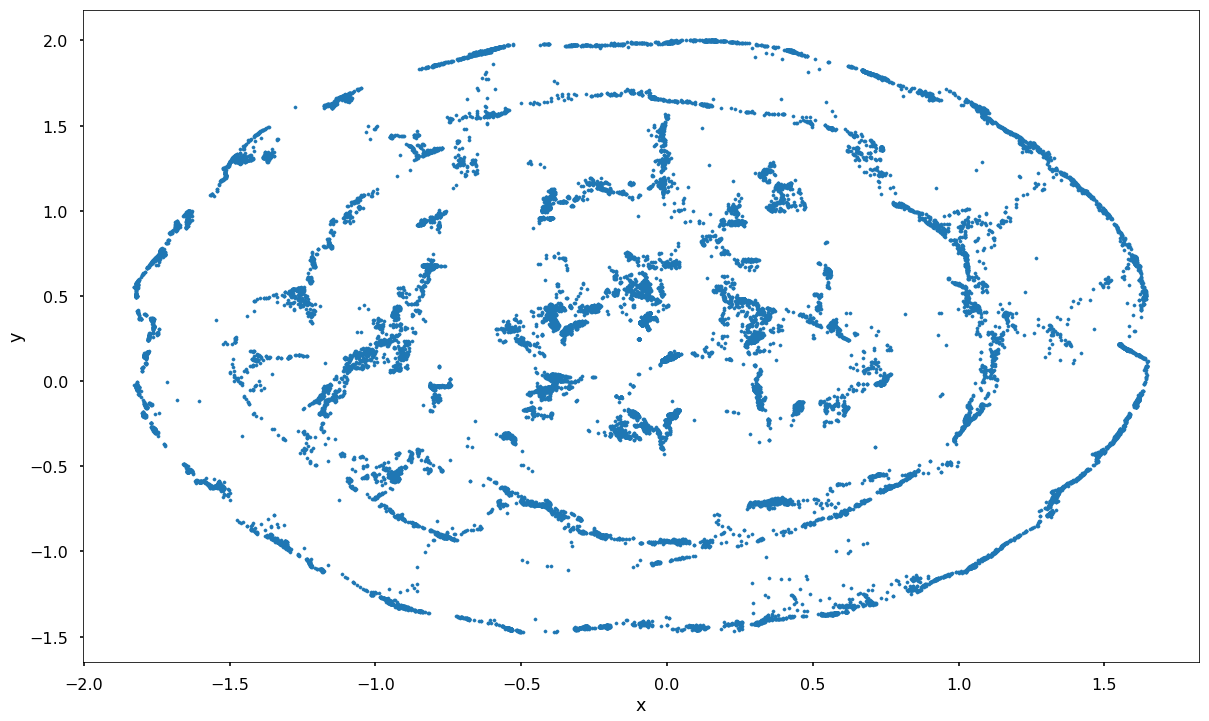

In [34]:
points.plot.scatter('x','y',s=10,figsize=(20,12))

In [35]:
def plot_region(x_bounds, y_bounds):
    
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=30, figsize=(18, 12))
    for i, point in slice.iterrows():
        ax.text(point.x , point.y, point.word, fontsize=11)

In [36]:
def getword(word):
    x = float(points.loc[points['word']==word]['x'].values)
    y = float(points.loc[points['word']==word]['y'].values)
    print(x,y)
    x_min = x - 0.001
    x_max = x + 0.001
    y_min = y - 0.001
    y_max = y + 0.001
    plot_region(x_bounds=(x_min,x_max), y_bounds=(y_min,y_max))
    

-0.09771963953971863 0.2474857121706009


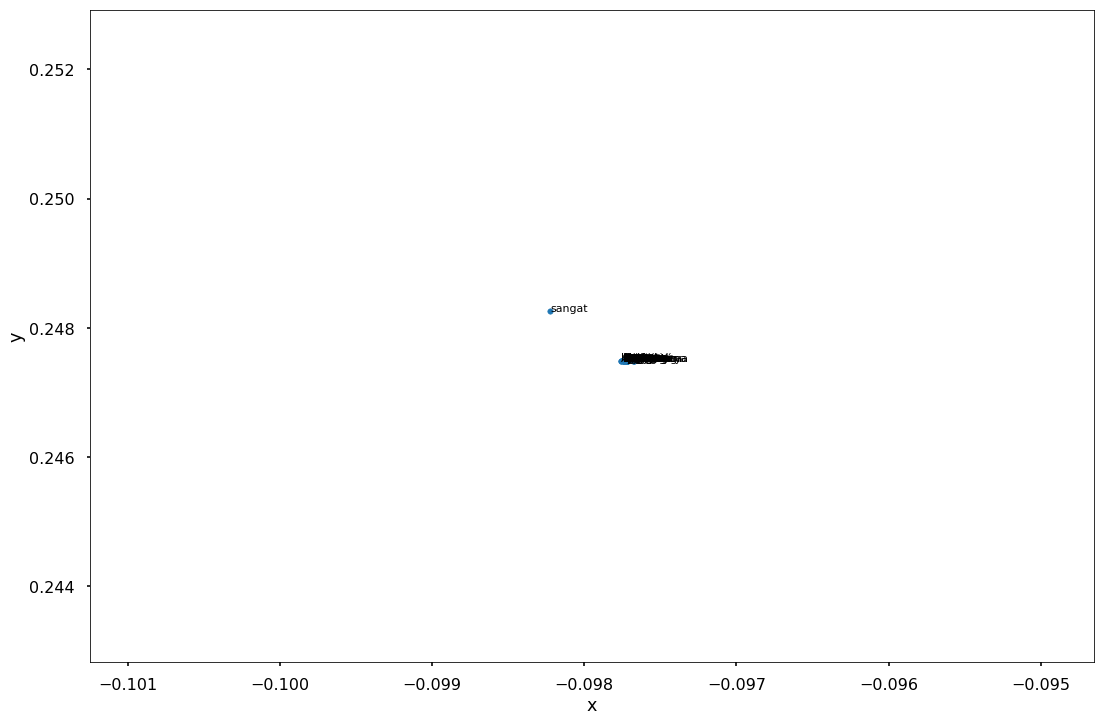

In [39]:
getword('kamu')

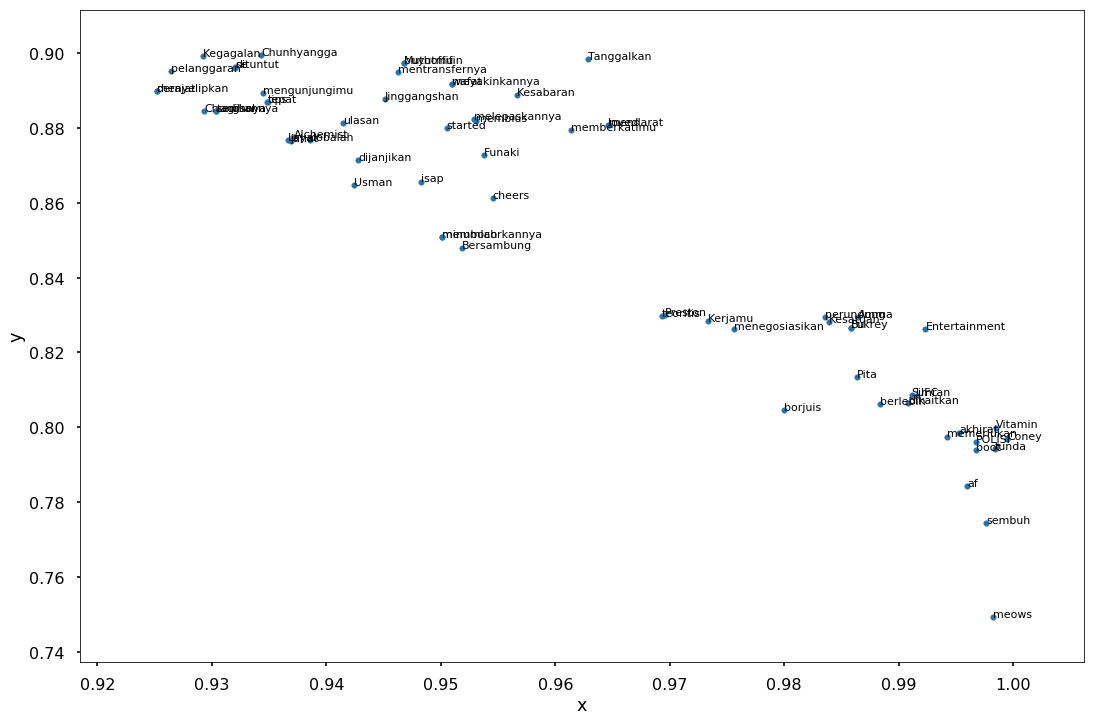

In [40]:
plot_region(x_bounds=(0.7, 1.0), y_bounds=(0.7, 0.9))

In [41]:
slice.head()

AttributeError: type object 'slice' has no attribute 'head'

In [42]:
myvec = tex2vec['']

C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


KeyError: "word '' not in vocabulary"

In [46]:
myvec = tex2vec.wv.word_vec("kontak")

In [47]:
myvec

array([ 4.17430000e-03,  6.11839332e-02,  2.19790503e-01,  4.18100208e-01,
        8.33191648e-02, -2.76466459e-01,  4.13393438e-01,  1.73654497e-01,
       -7.48803735e-01, -2.53774524e-01, -4.50360268e-01, -5.40659606e-01,
       -2.96786707e-02, -5.10063171e-01, -5.26408590e-02, -1.86028872e-02,
        6.20135605e-01, -1.01825334e-01, -1.23422593e-01,  1.98296621e-01,
       -1.18566342e-01, -7.18189001e-01, -3.66605848e-01, -2.12467402e-01,
        7.96944141e-01,  1.20282792e-01,  5.62330842e-01, -4.47962970e-01,
        1.07163340e-02,  2.17130724e-02,  8.80578011e-02,  7.18906894e-02,
        4.45618272e-01,  7.16532290e-01,  3.38702768e-01, -5.18068850e-01,
        8.55118185e-02,  5.26875034e-02, -8.34116936e-02, -2.06116498e-01,
        3.05975266e-02, -5.47519743e-01,  3.20042185e-02, -1.80062354e-01,
        2.67979532e-01, -3.29990864e-01,  1.81906857e-02,  3.43910784e-01,
        8.19592834e-01,  1.69171676e-01, -4.78436321e-01,  2.44026721e-01,
        9.04360786e-02,  

In [48]:
#cari pake vector yang ada
tex2vec.wv.most_similar(positive=[myvec],topn=1)

C:\Anaconda3\envs\tensorflow\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kontak', 1.0)]

In [52]:
tex2vec.similar_by_word("peta")

C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
C:\Anaconda3\envs\tensorflow\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Skallingen', 0.4493243992328644),
 ('tunjukkannya', 0.43221431970596313),
 ('gambarkan', 0.41597980260849),
 ('kecemerlangan', 0.4137057363986969),
 ('ang', 0.40680646896362305),
 ('mencetaknya', 0.4045335650444031),
 ('Peta', 0.39995276927948),
 ('kuhentikan', 0.3982464373111725),
 ('jadwalku', 0.3942292630672455),
 ('dubh', 0.39129549264907837)]

In [42]:
#Hubungan Linear dari sebuah kata

In [53]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = tex2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2


In [54]:
nearest_similarity_cosmul("saya", "kamu", "pergi")

saya is related to kamu, as penyuluh is related to pergi


C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'penyuluh'

In [55]:
type(all_word_vector_matrix_2d)

numpy.ndarray

In [56]:
all_word_vector_matrix_2d.tofile("cerpen.fil")

In [57]:
len(all_word_vector_matrix_2d)

30962

In [58]:
all_word_vector_matrix_2d[1]

array([-0.09773878,  0.24747962], dtype=float32)

In [59]:
af = np.fromfile('cerpen.fil')

array([-5.57390906e-10, -5.52423324e-10, -5.27025418e-10, ...,
       -1.20257737e-09,  1.07779051e-03, -5.59426611e-10])